In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl
    
import sys
sys.path.insert(0, '..')
sys.path.insert(0, '/home/dhruv/codebase/pyLDLE2/')

In [2]:
import numpy as np
from pyLDLE2 import util_, visualize_, datasets, buml_
from scipy.sparse import coo_matrix
from scipy import optimize
from scipy.special import erf, erfinv
from matplotlib import pyplot as plt
from scipy.stats import chi2
from scipy.sparse.linalg import svds
import bx_util

matplotlib.get_backend() =  module://ipympl.backend_nbagg


In [3]:
vis = visualize_.Visualize()

In [4]:
ex_name = '../figures/final_figures/heteroskedastic_torus_high_amb'

In [5]:
X0_, labelsMat0_, ddX0 = datasets.Datasets().curvedtorus3d(n=8000, noise=0)

X.shape =  (8000, 3)


In [6]:
thresh = 0.18
mask = X0_[:,0] < thresh
X0 = X0_[mask,:]
labelsMat0 = labelsMat0_[mask,:]
dX = X0[:,0] > thresh-0.01
sp_dist0 = util_.shortest_paths(X0, 5, return_predecessors=False)
ddX = np.min(sp_dist0[dX,:], axis=0)

In [7]:
m=2000
np.random.seed(42)
O_rand, _, _ = svds(np.random.normal(0,1,(m,3+1)), 3)
#O_rand = np.eye(3)
X_ = X0.dot(O_rand.T)

In [8]:
theta = labelsMat0[:,0]

In [9]:
np.random.seed(42)
noise_r = 0.01 + 0.075*(1+np.cos(2*theta))/2
noise = np.random.normal(0, 1, X_.shape)
noise = noise/(np.linalg.norm(noise, axis=1)[:,None])
noise = noise - noise.dot(O_rand).dot(O_rand.T)
noise = noise_r[:,None]*noise
X = X_ + noise

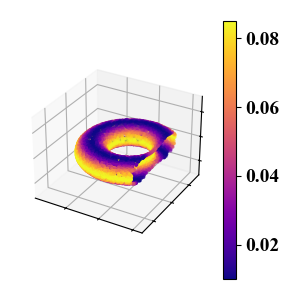

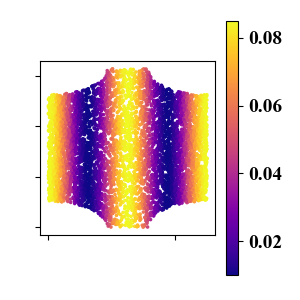

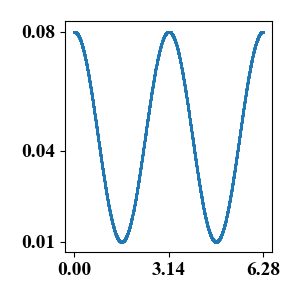

In [10]:
vis.data(X.dot(O_rand), noise_r, cmap='plasma', figsize=(3,3), s=10, title=None, colorbar=True)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.gca().set_zticklabels([])
plt.savefig(ex_name + '_noise.pdf', dpi=400)

vis.data(labelsMat0, noise_r, cmap='plasma', figsize=(3,3), s=10, title=None, colorbar=True)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.savefig(ex_name + '_noise_on_domain.pdf', dpi=400)

import matplotlib.ticker as ticker
plt.figure(figsize=(3,3))
plt.scatter(theta, noise_r, s=3)
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
# plt.xticks([0, np.pi, 2*np.pi], ['$0$', '$\\pi$', '$2\\pi$'])
# plt.yticks([0, np.max(noise_r)/2, np.max(noise_r)], ['$0$', '$0.0425$', '$0.085$'])
plt.xticks([0, np.pi, 2*np.pi])
plt.yticks([0.01, np.max(noise_r)/2, np.max(noise_r)])
plt.tight_layout()
plt.savefig(ex_name + '_noise_curve.pdf', dpi=400)

In [11]:
labelsMat = labelsMat0

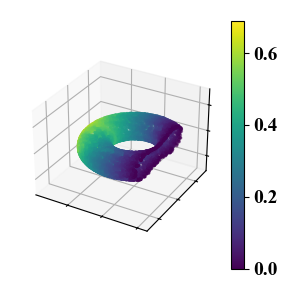

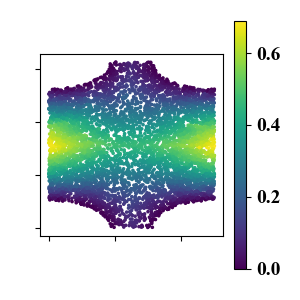

In [12]:
vis.data(X.dot(O_rand), ddX, cmap='viridis', figsize=(3,3), s=10, title=None, colorbar=True)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.gca().set_zticklabels([])
plt.savefig(ex_name + '_ddX.pdf', dpi=400)

vis.data(labelsMat, ddX, cmap='viridis', figsize=(3,3), s=10, title=None, colorbar=True)
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.savefig(ex_name + '_ddX_on_domain.pdf', dpi=400)

In [13]:
np.sum(np.abs(X0 - X.dot(O_rand)))

9.600506137009924e-13

In [14]:
np.sum(np.abs(X - X.dot(O_rand).dot(O_rand.T)))

10461.69836239907

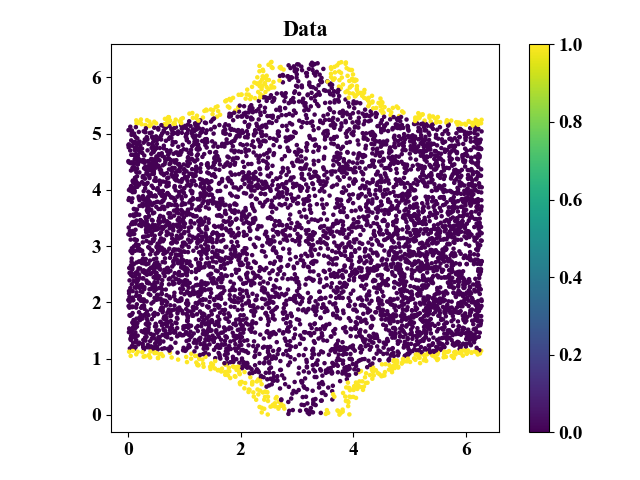

In [15]:
max_prctile = 100*np.sum(ddX<0.04)/len(ddX)
vis.data(labelsMat, ddX<np.percentile(ddX, max_prctile), cmap='viridis', colorbar=True)
plt.savefig(ex_name + '_dX.png')

In [16]:
max_prctile

8.307642381956839

In [17]:
opts = bx_util.default_opts.copy()
opts['k_nn'] = 256
opts['h'] = 0.1
opts['local_subspace'] = None
opts['d'] = 2
bx_ds, bx_init_ds, W_ds, D_ds, nu_norm_ds = bx_util.estimate_bx(X, opts=opts)

Error: 0.04939011235792479
Error: 0.0070199921869253945
Error: 0.0009160809710616613
Error: 0.00011756956835395904
Error: 1.4849211049661193e-05
Error: 1.8605179745723177e-06
Error: 2.31980250342545e-07
Error: 2.8840137833441304e-08
Error: 3.5791765107262563e-09
Error: 4.437332723483678e-10
Error: 5.498113075930178e-11
Error: 6.809885988445785e-12
Error: 8.443246102274315e-13
Error: 1.0480505352461478e-13
Error: 1.3211653993039363e-14
Error: 2.55351295663786e-15
Error: 6.661338147750939e-16
Sinkhorn converged at iter: 17


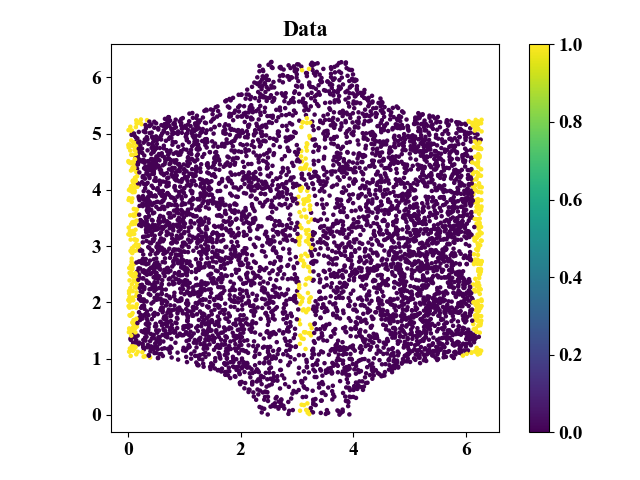

In [18]:
vis.data(labelsMat, bx_ds<np.percentile(bx_ds, max_prctile), cmap='viridis', colorbar=True)
plt.show()

In [38]:
opts = bx_util.default_opts.copy()
opts['k_nn'] = 256
opts['h'] = 0.1
opts['local_subspace'] = None
opts['d'] = 2
opts['no_newton'] = False
opts['optimizer'] = 'gd'
opts['lr'] = 0.1
opts['reg'] = 0.01
bx_ds_smooth, bx_init_ds_smooth, W_ds_smooth, D_ds_smooth, nu_norm_ds_smooth = bx_util.estimate_bx(X, opts=opts)

Error: 0.04939011235792479
Error: 0.0070199921869253945
Error: 0.0009160809710616613
Error: 0.00011756956835395904
Error: 1.4849211049661193e-05
Error: 1.8605179745723177e-06
Error: 2.31980250342545e-07
Error: 2.8840137833441304e-08
Error: 3.5791765107262563e-09
Error: 4.437332723483678e-10
Error: 5.498113075930178e-11
Error: 6.809885988445785e-12
Error: 8.443246102274315e-13
Error: 1.0480505352461478e-13
Error: 1.3211653993039363e-14
Error: 2.55351295663786e-15
Error: 6.661338147750939e-16
Sinkhorn converged at iter: 17
Iter: 1 :: loss: 0.027459785590247737
Iter: 2 :: loss: 0.027394250256945647
Iter: 3 :: loss: 0.027329081245000685
Iter: 4 :: loss: 0.027264275196343765
Iter: 5 :: loss: 0.027199828795977356
Iter: 6 :: loss: 0.027135738771265183
Iter: 7 :: loss: 0.027072001891236385
Iter: 8 :: loss: 0.027008614965903507
Iter: 9 :: loss: 0.026945574845594185
Iter: 10 :: loss: 0.02688287842029612
Iter: 11 :: loss: 0.02682052261901507
Iter: 12 :: loss: 0.02675850440914553
Iter: 13 :: loss:

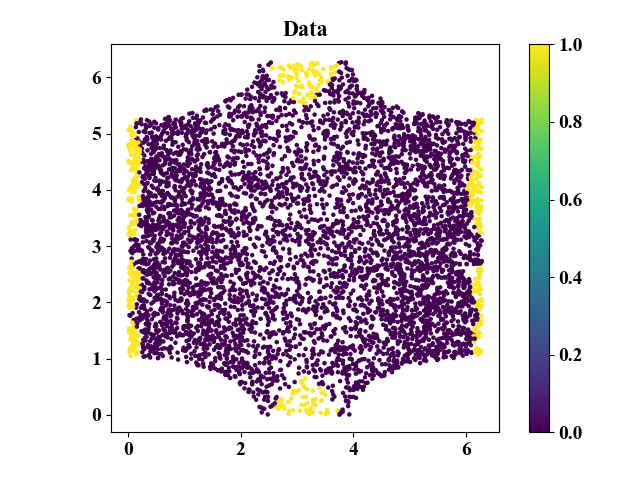

In [39]:
vis.data(labelsMat, bx_ds_smooth<np.percentile(bx_ds_smooth, max_prctile), cmap='viridis', colorbar=True)
plt.show()

In [19]:
opts = bx_util.default_opts.copy()
opts['k_nn'] = 256
opts['h'] = 0.1
opts['local_subspace'] = 'local_pca'
opts['d'] = 2
bx_ds_lpca, bx_init_ds_lpca, W_ds_lpca, D_ds_lpca, nu_norm_ds_lpca = bx_util.estimate_bx(X, opts=opts)

Error: 0.04939011235792479
Error: 0.0070199921869253945
Error: 0.0009160809710616613
Error: 0.00011756956835395904
Error: 1.4849211049661193e-05
Error: 1.8605179745723177e-06
Error: 2.31980250342545e-07
Error: 2.8840137833441304e-08
Error: 3.5791765107262563e-09
Error: 4.437332723483678e-10
Error: 5.498113075930178e-11
Error: 6.809885988445785e-12
Error: 8.443246102274315e-13
Error: 1.0480505352461478e-13
Error: 1.3211653993039363e-14
Error: 2.55351295663786e-15
Error: 6.661338147750939e-16
Sinkhorn converged at iter: 17


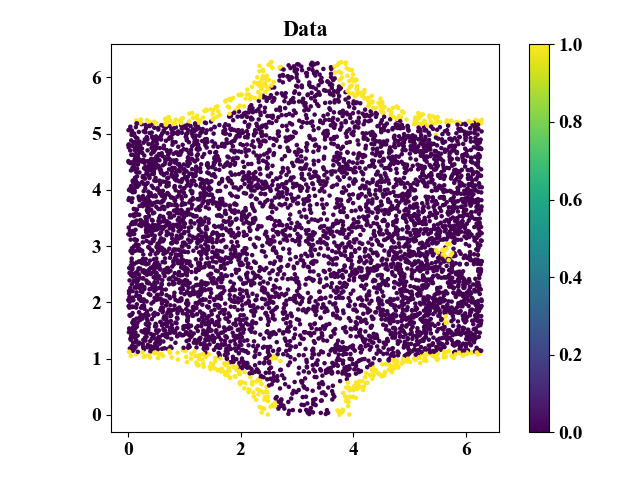

In [20]:
vis.data(labelsMat, bx_ds_lpca<np.percentile(bx_ds_lpca, max_prctile), cmap='viridis', colorbar=True)
plt.show()

In [26]:
opts = bx_util.default_opts.copy()
opts['k_nn'] = 256
opts['h'] = 0.1
opts['local_subspace'] = 'local_pca'
opts['d'] = 2
opts['no_newton'] = False
opts['optimizer'] = 'gd'
opts['lr'] = 0.1
opts['reg'] = 0.01
bx_ds_lpca_smooth, bx_init_ds_lpca_smooth, W_ds_lpca_smooth, D_ds_lpca_smooth, nu_norm_ds_lpca_smooth = bx_util.estimate_bx(X, opts=opts)

Error: 0.04939011235792479
Error: 0.0070199921869253945
Error: 0.0009160809710616613
Error: 0.00011756956835395904
Error: 1.4849211049661193e-05
Error: 1.8605179745723177e-06
Error: 2.31980250342545e-07
Error: 2.8840137833441304e-08
Error: 3.5791765107262563e-09
Error: 4.437332723483678e-10
Error: 5.498113075930178e-11
Error: 6.809885988445785e-12
Error: 8.443246102274315e-13
Error: 1.0480505352461478e-13
Error: 1.3211653993039363e-14
Error: 2.55351295663786e-15
Error: 6.661338147750939e-16
Sinkhorn converged at iter: 17
Iter: 1 :: loss: 0.057298138050997094
Iter: 2 :: loss: 0.057135967035365595
Iter: 3 :: loss: 0.05697484843284388
Iter: 4 :: loss: 0.05681477128766232
Iter: 5 :: loss: 0.056655724801985184
Iter: 6 :: loss: 0.05649769833299189
Iter: 7 :: loss: 0.056340681390024176
Iter: 8 :: loss: 0.056184663631797464
Iter: 9 :: loss: 0.05602963486367471
Iter: 10 :: loss: 0.05587558503500102
Iter: 11 :: loss: 0.05572250423649744
Iter: 12 :: loss: 0.055570382697712487
Iter: 13 :: loss: 0.

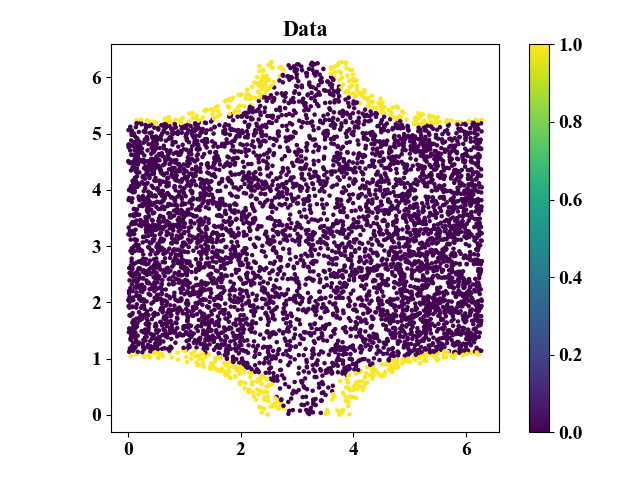

In [27]:
vis.data(labelsMat, bx_ds_lpca_smooth<np.percentile(bx_ds_lpca_smooth, max_prctile), cmap='viridis', colorbar=True)
plt.show()

In [28]:
opts = bx_util.default_opts.copy()
opts['k_nn'] = 256
opts['h'] = 0.1
opts['local_subspace'] = 'local_pca'
bx_berry_sauer_w_lpca, bx_berry_sauer_init_w_lpca, nu_norm_berry_sauer_w_lpca = bx_util.estimate_bx_berry_and_sauer(X, opts=opts)

Error at iter: 0 is: 0.08846450704957903
newton method converged at iter: 4


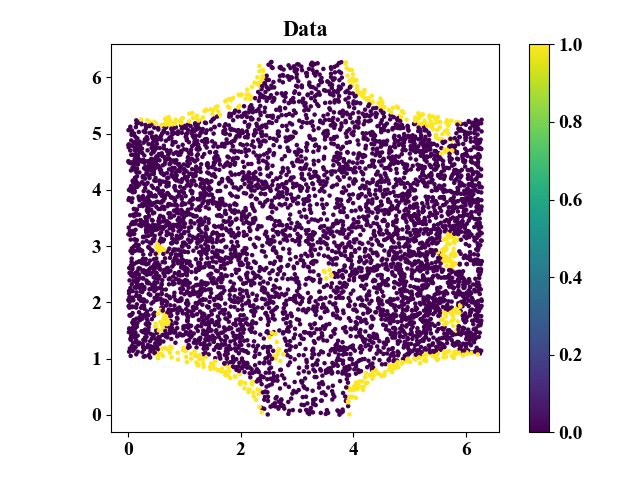

In [29]:
vis.data(labelsMat, bx_berry_sauer_w_lpca<np.percentile(bx_berry_sauer_w_lpca, max_prctile), cmap='viridis', colorbar=True)

In [30]:
opts = bx_util.default_opts.copy()
opts['k_nn'] = 256
opts['h'] = 0.1
bx_berry_sauer, bx_berry_sauer_init, nu_norm_berry_sauer = bx_util.estimate_bx_berry_and_sauer(X, opts=opts)

Error at iter: 0 is: 0.08856963877987127
newton method converged at iter: 4


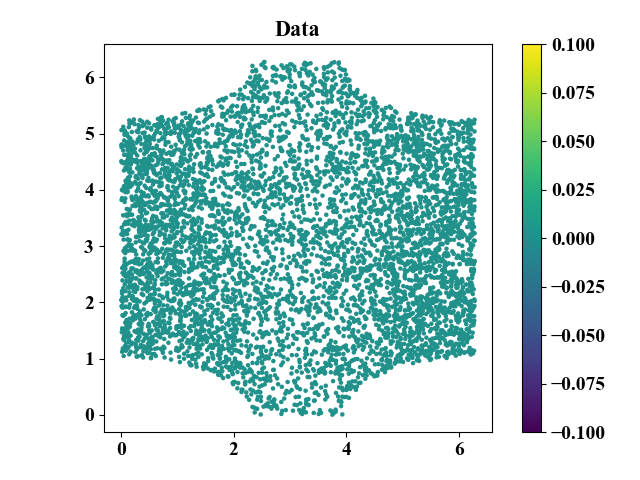

In [31]:
vis.data(labelsMat, bx_berry_sauer<np.percentile(bx_berry_sauer, max_prctile), cmap='viridis', colorbar=True)

/home/dhruv/codebase/pyLDLE2/pyLDLE2/visualize_.py:227: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


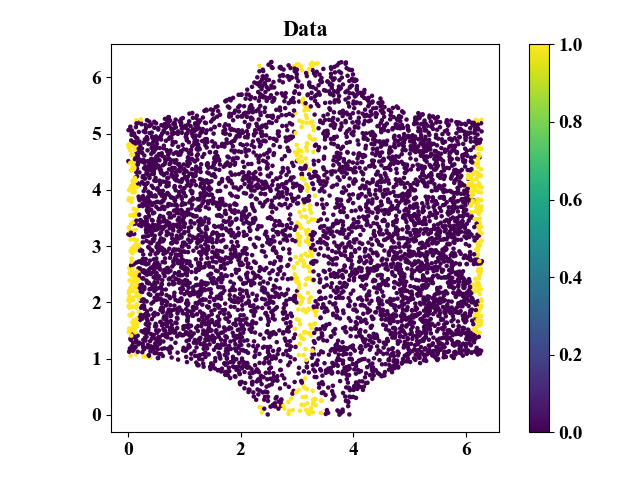

In [42]:
import graphlearning as gl
k_nn = 256
bx_CPS = gl.utils.boundary_statistic(X, k_nn, knn=True)
vis.data(labelsMat, bx_CPS<np.percentile(bx_CPS, max_prctile), cmap='viridis', colorbar=True)
plt.show()

In [45]:
prctiles = np.arange(2, 14, 1)
jac_ind_bs_lpca = []
jac_ind_bs = []
jac_ind_ds_lpca = []
jac_ind_ds_lpca_smooth = []
jac_ind_ds = []
jac_ind_cps = []

for prctile in prctiles:
    jac_ind_ds_lpca.append(bx_util.compute_jaccard_index(ddX, bx_ds_lpca, prctile))
    jac_ind_ds_lpca_smooth.append(bx_util.compute_jaccard_index(ddX, bx_ds_lpca_smooth, prctile))
    jac_ind_ds.append(bx_util.compute_jaccard_index(ddX, bx_ds, prctile))
    jac_ind_bs_lpca.append(bx_util.compute_jaccard_index(ddX, bx_berry_sauer_w_lpca, prctile))
    jac_ind_bs.append(bx_util.compute_jaccard_index(ddX, bx_berry_sauer, prctile))
    jac_ind_cps.append(bx_util.compute_jaccard_index(ddX, bx_CPS, prctile))

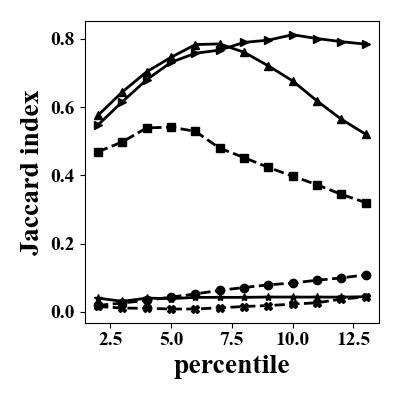

In [53]:
plt.figure(figsize=(4,4))
plt.plot(prctiles, jac_ind_ds_lpca, '-k^', label='DS + LPCA', linewidth=2)
plt.plot(prctiles, jac_ind_ds_lpca_smooth, '-k>', label='Standard + LPCA + Smooth', linewidth=2)
plt.plot(prctiles, jac_ind_ds, '-k*', label='DS', linewidth=2)
plt.plot(prctiles, jac_ind_bs_lpca, '--ks', label='Standard + LPCA', linewidth=2)
plt.plot(prctiles, jac_ind_bs, '--ko', label='Standard', linewidth=2)
plt.plot(prctiles, jac_ind_cps, '--kX', label='CPS', linewidth=2)
plt.xlabel('percentile', fontsize=20)
plt.ylabel('Jaccard index', fontsize=20)
plt.tight_layout()
#plt.legend(framealpha=0)
plt.savefig(ex_name + '_result_1.png', dpi=400)

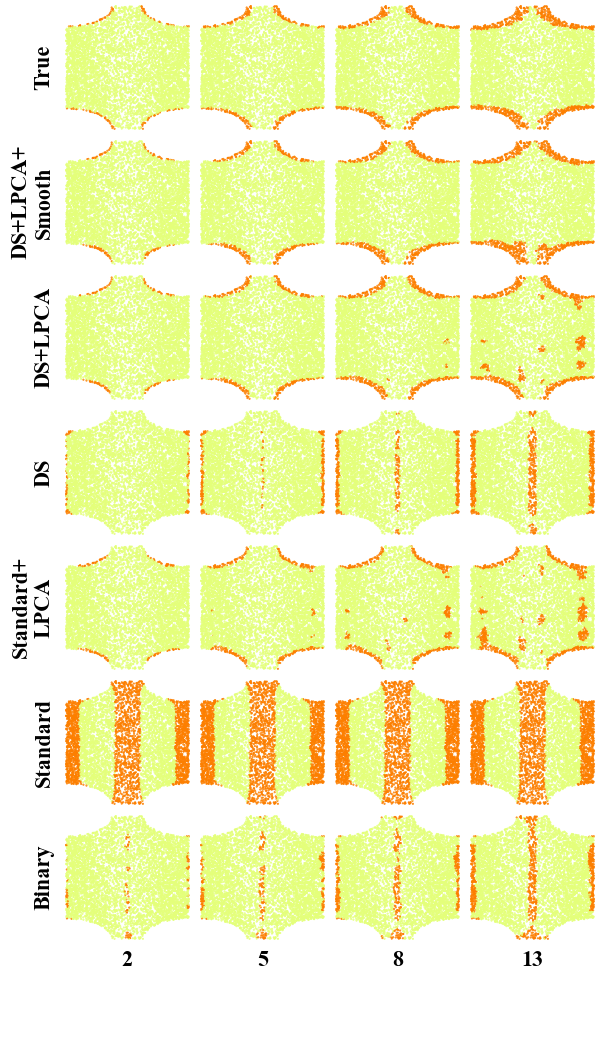

In [54]:
prctiles_ = [prctiles[0]] + prctiles[3:-3:3].tolist() + [prctiles[-1]]
bx_estimates = [
    ddX,
    bx_ds_lpca_smooth,
    bx_ds_lpca,
    bx_ds,
    bx_berry_sauer_w_lpca,
    bx_berry_sauer,
    bx_CPS
]
#ylabels = ['$\\text{True}$', '$\\text{DS+LPCA}$', '$\\text{DS}$', '$\\text{Standard+}$\n$\\text{LPCA}$', '$\\text{Standard}$']
ylabels = ['True', 'DS+LPCA+\nSmooth', 'DS+LPCA', 'DS', 'Standard+\nLPCA', 'Standard', 'Binary']
fig_h = 1.5
cmap = 'Wistia'
n_bx_estimates = len(bx_estimates)
n_percentiles = len(prctiles_)
fig, ax = plt.subplots(n_bx_estimates, n_percentiles, figsize=(n_percentiles*fig_h,n_bx_estimates*fig_h))
plt.subplots_adjust(left=0.1, bottom=0.1, right=1, top=1, wspace=0, hspace=0)
for i in range(n_bx_estimates):
    for j in range(n_percentiles):
        thresh = np.percentile(bx_estimates[i], prctiles_[j])
        ax[i,j].scatter(*labelsMat0.T, c=bx_estimates[i]<=thresh, cmap=cmap, s=1, vmin=0, vmax=1)
        if j == 0:
            ax[i,j].set_ylabel(ylabels[i])
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].spines[['left', 'right', 'top', 'bottom']].set_visible(False)

for j in range(n_percentiles):
    ax[-1,j].set_xlabel(str(prctiles_[j]))

plt.savefig(ex_name + '_result_2.png', dpi=400)

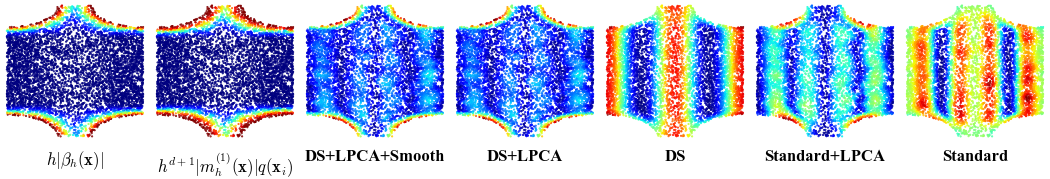

In [51]:
nu_norm_true1 = -opts['h']*bx_util.compute_beta(ddX, opts['h'])
nu_norm_true2 = -(opts['h']**(opts['d']+1))*bx_util.compute_m1(ddX, opts['h'])
nu_norm_estimates = [
    nu_norm_true1,
    nu_norm_true2,
    nu_norm_ds_lpca_smooth,
    nu_norm_ds_lpca,
    nu_norm_ds,
    nu_norm_berry_sauer_w_lpca,
    nu_norm_berry_sauer
]
# xlabels = ['$h\\xi_h(\\mathbf{x})/|m_{h}^{(1)}(\\mathbf{x})|$', '$h^{d+1}|m_h^{(1)}(\\mathbf{x})|q(\\mathbf{x}_i)$',
#            '$\\left\\|\\boldsymbol{\\nu}_i\\right\\|$', '$\\left\\|\\boldsymbol{\\nu}_i\\right\\|_2$ w/o local PCA',
#            '$\\left\\|\\boldsymbol{\\mu}_i\\right\\|$ with local PCA', '$\\left\\|\\boldsymbol{\\mu}_i\\right\\|$']

xlabels = ['$h|\\beta_h(\\mathbf{x})|$', '$h^{d+1}|m_h^{(1)}(\\mathbf{x})|q(\\mathbf{x}_i)$',
           'DS+LPCA+Smooth','DS+LPCA', 'DS',
           'Standard+LPCA', 'Standard']
fig_h = 1.5
n_estimates = len(nu_norm_estimates)
fig, ax = plt.subplots(1, n_estimates, figsize=(n_estimates*fig_h, 1.2*fig_h))
plt.subplots_adjust(left=0, bottom=0.2, right=1, top=1, wspace=0, hspace=0)
for i in range(n_estimates):
    ax[i].scatter(*labelsMat0.T, c=nu_norm_estimates[i], cmap='jet', s=1)
    ax[i].set_xlabel(xlabels[i], fontsize=12)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].spines[['left', 'right', 'top', 'bottom']].set_visible(False)
    #ax[i].axis('image')
#plt.tight_layout()
plt.savefig(ex_name + '_result_4.png', dpi=400)